*                                                  
                                                   
                                                   
 *                                                 
                                                   
  *                                                
   *                                               
    *                                              
     *                                             
      *                                            
       *                                         **
        *                                       *  
         **                                   **   
           *                                 *     
            **                            * *      
              ***                       ***        
                 ***                 ***           
                    *****************              


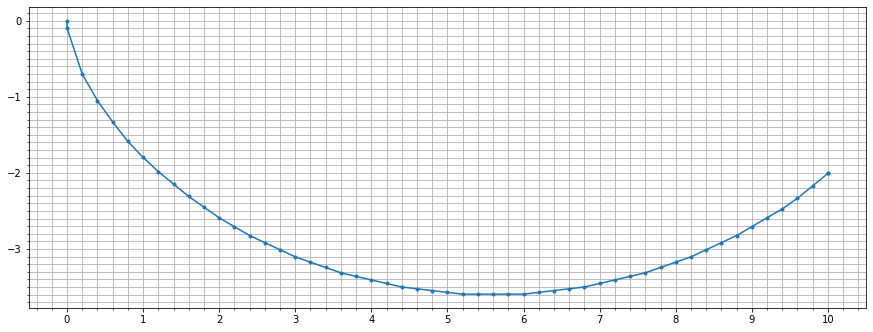

最少需要的时间为 6.155


In [2]:
'''
问题：用动态规划计算最速降线

【问题描述】
假设有一个弯曲的斜坡，连接着从地面上一点 O 到离它水平距离为 l 深度为 h 的另一点 X。
这个斜坡的形状各点弯曲程度可以任意设计。
现在把一个静止的小球从原点释放，请写一个程序设计能使这个小球到达 X 点时间最短的斜坡，并计算所需要的时间。

【编程练习】
 * 把程序复制到自己的笔记本上
 * 阅读并试图理解代码
 * 找到代码中标有 “【编程练习】 补全代码” 的地方，补全缺失的代码
 * 跑通程序，运行并记录结果
 * 修改程序参数（如水平距离、垂直距离、网格数等），观察最速降线和最短时间如何变化

【思考题】
 * 最速降线中的任意一点能否高于原点？
 * 重力加速度的大小是否会改变最速降线的形状？会如何改变最短时间？
 * 如果距离和深度都增加一倍，最速降线会如何变化？最短时间会如何变化？

'''

gravity = 1

m = 50 # 横向网格数
n = 300 # 纵向网格数
l = 10 # 水平距离
h = 2 # 垂直距离


def brachistochrone(l, h, m, n):
    '''
    【用动态规划计算最速降线及所需时间】
    
    问题：假设有一个弯曲的斜坡，连接着从地面上一点 O 到离它水平距离为 l 深度为 h 的另一点 X
    现将一个静止的小球从 O 点释放，
    计算能使从 O 到 X 时间最短的斜坡的形状，所需的时间

    参数：
    l: 水平距离
    h: 垂直深度
    m: 水平网格数
    n: 垂直网格数
    
    返回值：
        最速降线上各点坐标构成的列表，
        最短时间,
        横向网格的大小,
        纵向网格的大小
    '''
    
    infty = 1e10
    dl = l/m # 每个网格的水平距离
    hmax = max(h, l*0.7) # 0.7 > 2/pi
    dh = hmax/n # 每个网格垂直距离

    # 动态规划的最短时间表
    # i: 横向网格坐标，可以从 0 到 m
    # j: 纵向网格坐标，可以从 0 到 n
    table = [[0 for j in range(n+1)] for i in range(m+1)]

    # 计算原点所在纵轴上各点的时间
    # 即自由落体的时间：t = (2*z/g)**0.5
    # 其中，z = j*dh 为网格点的深度
    for j in range(1, n+1):
        table[0][j] = (2*j*dh/gravity)**0.5

    # 初始化动态规划的回溯表
    # 如果 back_table[i][j] = j_prev
    # 纳闷从原点 O 到网格点 (i, j) 的最优曲线是从上一水平位置的 (i - 1, j_prev) 来的
    back_table = [[j for j in range(n+1)] for i in range(m+1)]
        
    # 初始化纵轴网格坐标上每一点的速度
    # 根据能量守恒，斜坡上任一点的速度为 (2*g*z)**0.5
    # 其中，z = j*dh 为该点的深度
    speed = [(2*j*dh*gravity)**0.5 for j in range(n+1)]

    # 动态规划的主循环：
    # 从原点开始水平方向推进，直到 X 所在的横坐标 i = m
    # 第一列已经初始化，所以从 i = 1 开始
    for i in range(1, m+1):
        # 对垂线上每一点进行计算
        for j in range(n+1):
            t_min, j_best = infty, j
            # 对上一个水平位置的每一点循环
            # 计算 O -- (i-1, j_prev) -- (i, j) 所需的时间
            for j_prev in range(n+1):
                # 计算一小段斜坡 (i-1, j_prev) -- (i, j) 所需的时间
                # 假定这一小段斜坡是直线，
                # 那么小球在这个斜坡上进行匀速直线运动
                # 所需的时间为小斜坡的长度除以平均速度

                # 计算始末两点的平均速度，如果速度为 0，用 1/infty 代替
                # 平均速度的大小由能量守恒定理决定，只和垂直位置有关
                v = max(1/infty, (speed[j] + speed[j_prev])*0.5) # 平均速度

                # 小斜坡段的长度 = 从 (i-1, j_prev) 到 (i, j) 的距离
                ds = (((j-j_prev)*dh)**2 + dl**2)**0.5

                # 在小斜坡段上所化的时间
                dt = ds / v 

                # 计算路径 O -- (i-1, j_prev) -- (i, j) 所需的时间
                t_j = table[i-1][j_prev] + dt
                
                # 更新 O -- (i, j) 的最速降线和最短时间
                if t_j < t_min:
                    # 【编程练习】 补全代码
                    # 更新最短时间
                    t_min = t_j
                    # 【编程练习】 补全代码
                    # 更新上一列的最佳垂直位置
                    j_best = j_prev

            # 更新最佳时间表
            # 【编程练习】 补全代码
            # 把最短时间加入动态规划表
            table[i][j] = t_min
            # 更新回溯表
            # 【编程练习】 补全代码
            # 把上一列的最佳垂直位置加入回溯表
            back_table[i][j] = j_best
            
    # 开始回溯
    # 列表上任一点是最速降线上的坐标
    ramp = [(l, -h)] # 先把终点的位置加入最速降线
    
    # 最速降线的最后一段是一个垂直坡段
    # 从最后的水平位置 i = m 上各点中选择一个垂直位置到终点的时间最短
    t_min, j_last = infty, n
    # 对垂直位置进行循环
    for j in range(n+1):
        # 计算始末两点的平均速度，如果速度为 0，用 1/infty 代替
        v = max(1/infty, 0.5*(speed[j] + (2*gravity*h)**0.5))
        
        # 垂直距离
        ds = abs(h - j*dh)
        
        # 在垂直坡段上所花的时间
        dt = ds / v
        
        # 计算到终点的时间
        t_j = table[m][j] + dt

        # 更新纵线 i = m 上的最佳垂直格点 (m, j_last)
        if t_j < t_min:
            t_min, j_last = t_j, j

    # 把最终的垂直格点 (m, j_last) 的坐标加入最速降线
    ramp = [(dl*m, -dh*j_last)] + ramp

    # 利用回溯表进行水平回溯
    j = j_last
    # 从最后的水平位置 i = m 回溯到 i = 1
    for i in range(m, 0, -1):
        j_prev = back_table[i][j]
        # 从 (i, j) 回溯到 (i-1, j_prev) 
        ramp = [(dl*(i-1), -dh*j_prev)] + ramp
        j = j_prev

    # i = 0 时，加入原点的自由落体垂直段
    ramp = [(0, 0)] + ramp

    return ramp, t_min, dl, dh


# 计算最速降线
ramp, t_min, dl, dh = brachistochrone(l, h, m, n)



# 把最速降线在命令行画出来
ramp_x, ramp_y = list(zip(*ramp)) # 把最速降线分解为 x 和 y 数组
max_y = abs(min(ramp_y)) # 提取纵坐标最大的值
j_max = int(max_y/dl) + 1
graph = [[' ']*(m+1) for j in range(j_max)]
for x, y in ramp:
    i = int(x/dl) # 水平坐标
    j = int(-y/dl) # 垂直坐标
    graph[j][i] = '*'
for j in range(j_max):
    print(''.join(graph[j]))


# 把最速降线的画出来，可以在命令行和 Jupyter 中运行
try:
    import matplotlib.pyplot as plt
    from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
    ramp_x, ramp_y = list(zip(*ramp)) # 把最速降线分解为 x 和 y 数组
    fig = plt.figure(figsize=(15, 15)) # 设置图片大小
    ax = fig.add_subplot(111,aspect='equal')
    ax.xaxis.set_major_locator(MultipleLocator(1)) # 横轴的主刻度
    ax.xaxis.set_minor_locator(AutoMinorLocator(5)) # 横轴的分刻度
    ax.yaxis.set_major_locator(MultipleLocator(1)) # 纵轴的主刻度
    ax.yaxis.set_minor_locator(AutoMinorLocator(10)) # 纵轴的分刻度
    ax.grid(True, which='both') # 画网格
    plt.plot(ramp_x, ramp_y, '.-') # 用点和连线绘图
    plt.show()
except:
    pass
    
print(f"最少需要的时间为 {t_min:.{4}}")